In [1]:
# 來源: Python機器學習與深度學習特訓班,文淵閣工作室, 碁峯出版

In [2]:
import requests
from bs4 import BeautifulSoup as soup
from PIL import Image
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import jieba
import numpy as np
from collections import Counter

In [3]:
urls = []
url = 'https://udn.com/news/breaknews/1'
html = requests.get(url)
# 將網頁的HTML程式碼取回來後，接著引用BeautifulSoup類別(Class)，
# 傳入取回的HTML結構字串，並且指定HTML的解析型態來建立其物件
sp = soup(html.text, 'html.parser')
#data1 = sp.select('#breaknews_body dl dt h2 a')
# 單純只想要透過css屬性值來進行HTML節點的搜尋
data1 = sp.select("#breaknews div div div a")

In [4]:
data1

[<a aria-label="中南部居家乾燥到需增濕 網問：需要買除濕機嗎？" class="story-list__image--holder" href="/news/story/120911/5076839?from=udn-ch1_breaknews-1-0-news"><picture><source data-srcset="https://pgw.udn.com.tw/gw/photo.php?u=https://uc.udn.com.tw/photo/2020/12/08/1/9216085.jpg&amp;s=Y&amp;x=20&amp;y=78&amp;sw=1200&amp;sh=800&amp;exp=3600&amp;w=300&amp;nt=1" type="image/webp"/><source data-srcset="https://pgw.udn.com.tw/gw/photo.php?u=https://uc.udn.com.tw/photo/2020/12/08/1/9216085.jpg&amp;s=Y&amp;x=20&amp;y=78&amp;sw=1200&amp;sh=800&amp;exp=3600&amp;w=300" type="image/jpeg"/><img alt="" class="lazyload" data-src="https://pgw.udn.com.tw/gw/photo.php?u=https://uc.udn.com.tw/photo/2020/12/08/1/9216085.jpg&amp;s=Y&amp;x=20&amp;y=78&amp;sw=1200&amp;sh=800&amp;exp=3600&amp;w=300"/></picture></a>,
 <a href="/news/story/120911/5076839?from=udn-ch1_breaknews-1-0-news" title="中南部居家乾燥到需增濕 網問：需要買除濕機嗎？">中南部居家乾燥到需增濕 網問：需要買除濕機嗎？</a>,
 <a href="/news/story/120911/5076839?from=udn-ch1_breaknews-1-0-news">台北近日陰雨綿綿濕度大增

In [5]:
for d in data1:
    urls.append('https://udn.com'+d.get('href'))

In [6]:
urls

['https://udn.com/news/story/120911/5076839?from=udn-ch1_breaknews-1-0-news',
 'https://udn.com/news/story/120911/5076839?from=udn-ch1_breaknews-1-0-news',
 'https://udn.com/news/story/120911/5076839?from=udn-ch1_breaknews-1-0-news',
 'https://udn.com/news/story/6656/5076914?from=udn-ch1_breaknews-1-0-news',
 'https://udn.com/news/story/6656/5076914?from=udn-ch1_breaknews-1-0-news',
 'https://udn.com/news/story/6656/5076914?from=udn-ch1_breaknews-1-0-news',
 'https://udn.com/news/story/7266/5076908?from=udn-ch1_breaknews-1-0-news',
 'https://udn.com/news/story/7266/5076908?from=udn-ch1_breaknews-1-0-news',
 'https://udn.com/news/story/7266/5076908?from=udn-ch1_breaknews-1-0-news',
 'https://udn.com/news/story/120944/5076871?from=udn-ch1_breaknews-1-0-news',
 'https://udn.com/news/story/120944/5076871?from=udn-ch1_breaknews-1-0-news',
 'https://udn.com/news/story/120944/5076871?from=udn-ch1_breaknews-1-0-news',
 'https://udn.com/news/story/120944/5076861?from=udn-ch1_breaknews-1-0-news'

In [7]:
urls = urls[0::3]

In [8]:
urls

['https://udn.com/news/story/120911/5076839?from=udn-ch1_breaknews-1-0-news',
 'https://udn.com/news/story/6656/5076914?from=udn-ch1_breaknews-1-0-news',
 'https://udn.com/news/story/7266/5076908?from=udn-ch1_breaknews-1-0-news',
 'https://udn.com/news/story/120944/5076871?from=udn-ch1_breaknews-1-0-news',
 'https://udn.com/news/story/120944/5076861?from=udn-ch1_breaknews-1-0-news',
 'https://udn.com/news/story/7266/5076832?from=udn-ch1_breaknews-1-0-news',
 'https://udn.com/news/story/6656/5076872?from=udn-ch1_breaknews-1-0-news',
 'https://udn.com/news/story/121837/5076867?from=udn-ch1_breaknews-1-0-news',
 'https://udn.com/news/story/6812/5076844?from=udn-ch1_breaknews-1-0-news',
 'https://udn.com/news/story/6885/5076866?from=udn-ch1_breaknews-1-0-news',
 'https://udn.com/news/story/7002/5076865?from=udn-ch1_breaknews-1-0-news',
 'https://udn.com/news/story/7321/5076864?from=udn-ch1_breaknews-1-0-news',
 'https://udn.com/news/story/7320/5076859?from=udn-ch1_breaknews-1-0-news',
 'ht

In [9]:
text_news = ''
i = 1
for url in urls:
    html = requests.get(url)
    sp = soup(html.text, 'html.parser')
    #搜尋網頁中符合指定的HTML標籤及css屬性值的所有節點
    data1 = sp.find_all(class_ = "article-content__paragraph")
    print('處理第{}則新聞'.format(i))
    for d in data1:
        if d.text.find('延伸閱讀')!=-1:
            break
        if d.text != '':
            text_news += d.text
    i += 1

處理第1則新聞
處理第2則新聞
處理第3則新聞
處理第4則新聞
處理第5則新聞
處理第6則新聞
處理第7則新聞
處理第8則新聞
處理第9則新聞
處理第10則新聞
處理第11則新聞
處理第12則新聞
處理第13則新聞
處理第14則新聞
處理第15則新聞
處理第16則新聞
處理第17則新聞
處理第18則新聞
處理第19則新聞
處理第20則新聞


In [10]:
text_news

"\n\n\n\n台北近日陰雨綿綿濕度大增，而台灣冬季更受東北季風影響，北部異常悶濕，除濕機更是戶戶必備家電。有網友在PTT WomenTalk 板貼文表示，親戚家住台中，家裡沒有除濕機或暖氣機，反倒是冬天太乾燥時須在房間放一盆水增加屋內濕度，所以好奇「中南部的大家家裡有除濕機嗎」？\n\r\n原PO表示，除濕機對北部家庭來說是必備品，因為用除濕機就不怕東西發霉，而原PO住台中的阿姨家裡並沒有除濕機或暖氣機，反倒是冬天，會因為太乾燥時需在房間放盆水增加濕度，完全沒有想過要除濕的問題。原PO還說阿姨家夏天也不開冷氣睡覺只吹電風扇，但有看過「夏天開除濕機會比較不那麼熱濕黏」的討論，所以想問問住中南部的網友家裡也有除濕機嗎？更想問用了除濕機的效果真有那麼好，值得投資嗎？\n\n\n\n\n\n\n\n\n\n\n\n\r\n網友們在看完PO文後，紛紛留言回應「有，用了回不去」、「南部，房間潮濕每天使用」、「住高雄每天開，濕度動不動就70幾」，也有網友表示「沒有，冷氣機Carry on」，更多的網友一致表示「一定要買，台灣太潮濕了」、「全台灣都需要」，最後有網友解釋「其實全台灣都需要除濕機，只是使用季節大不同，梅雨季時中南部需除溼，北部是冬天需除濕」。\n \n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n央行總裁楊金龍昨天宣布打房新政策，國民黨立委費鴻泰今天在立法院質詢時直批重大政策竟處理得如此匆促，還問楊金龍，有一一徵詢過央行常務理事的意見嗎？楊金龍回答「有」，但費鴻泰質疑，楊金龍只徵詢過一位常務理事，名字叫做陳南光，「這個人就是總統蔡英文姊夫所欽定來擔任央行副總裁的人物」。民進黨表示，聽見了費鴻泰為建商大罵中央打炒房，卻聽不見費鴻泰為買不起房子的小老百姓發聲。\n\r\n總統府發言人張惇涵鄭重表示，相關說法完全虛構不實，「費委員近期的無端指控已非第一次，也呼籲費委員，若要指控應提出具體證據，國會言論免責權不是造謠的保護傘。」\n\n\n\n\n\n\n\n\n\n\n\n\r\n張惇涵表示，央行所提出的相關政策，是由財政部、金管會、央行等政府部門依照專業研擬，目的在抑制不當的房屋炒作，期盼朝野政黨皆能理性溝通，讓政策有效推動，減低民眾房屋負擔壓力。費若有合理反對政策的理由，可以提出討論，但類似無端的政治操作，並無助於相關政策的討論。\n\r\n民進黨表示

In [11]:
stops = []
with open('../week5/jieba_dictionary/stopwords.txt','r',encoding='utf-8') as file:
    for line in file.readlines():
        stops.append(line.strip())


# 文章自動摘要

In [12]:
import summary as ausu

### 原理: 建立一個計算句子權重的函式，此函式包含關鍵詞數量、句子位置及句子相似度，計算文章中所有句子的權重，然後遞減排序，擷取使用者指定的句子數量，最後依據它們在原文中的先後順序再次進行排序輸出。

### tf-idf (term frequency - inverse document frequency):一種於資訊檢索與文字挖掘的常用加權技術。用以評估一個字詞對於一個檔案的重要程度。字詞的重要性會隨著它在檔案中出現的次數成正比增加

### summary模組包含下列方法
* split_sentence(text,punctuation_list='!?。！？')
* get_tfidf_matrix(sentence_set,stop_word)
* get_sentence_with_words_weight(tfidf_matrix)
* get_sentence_with_position_weight(sentence_set)
* get_similarity_weight(tfidf_matrix)
* ranking_base_on_wieght(sentence_with_words_weight,sentence_with_position_weight,sentence_score,feature_weight=[1,1,1])
* get_summarization(sentence_with_index,sort_sent_weight,topK_ratio=0.3)

In [13]:
stops = []
with open('../week5/jieba_dictionary/stopwords.txt','r',encoding='utf-8') as file:
    for line in file.readlines():
        stops.append(line.strip())

import summary as ausu
text_news = ''
i = 1
for url in urls[0:5]:
    html = requests.get(url)
    sp = soup(html.text, 'html.parser')
    #搜尋網頁中符合指定的HTML標籤及css屬性值的所有節點
    data1 = sp.find_all(class_ = "article-content__paragraph")
    print('處理第{}則新聞'.format(i))
    for d in data1:
        if d.text.find('延伸閱讀')!=-1:
            break
        if d.text != '':
            text_news += d.text
    sentences, indexs = ausu.split_sentence(text_news)
    tfidf = ausu.get_tfidf_matrix(sentences, stops)
    word_weight = ausu.get_sentence_with_words_weight(tfidf)
    posi_weight = ausu.get_sentence_with_position_weight(sentences)
    scores = ausu.get_similarity_weight(tfidf)
    sort_weight = ausu.ranking_base_on_weight(word_weight,posi_weight,scores,feature_weight = [1,1,1])
    summar = ausu.get_summarization(indexs,sort_weight,topK_ratio=0.1) #取得摘要
    print('原文:\n',text_news)
    print('------------------------')
    print('摘要:\n',summar)
    print('=============================================')
    i += 1

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\MIGUEL~1\AppData\Local\Temp\jieba.cache


處理第1則新聞


Loading model cost 0.587 seconds.
Prefix dict has been built successfully.


原文:
 



台北近日陰雨綿綿濕度大增，而台灣冬季更受東北季風影響，北部異常悶濕，除濕機更是戶戶必備家電。有網友在PTT WomenTalk 板貼文表示，親戚家住台中，家裡沒有除濕機或暖氣機，反倒是冬天太乾燥時須在房間放一盆水增加屋內濕度，所以好奇「中南部的大家家裡有除濕機嗎」？

原PO表示，除濕機對北部家庭來說是必備品，因為用除濕機就不怕東西發霉，而原PO住台中的阿姨家裡並沒有除濕機或暖氣機，反倒是冬天，會因為太乾燥時需在房間放盆水增加濕度，完全沒有想過要除濕的問題。原PO還說阿姨家夏天也不開冷氣睡覺只吹電風扇，但有看過「夏天開除濕機會比較不那麼熱濕黏」的討論，所以想問問住中南部的網友家裡也有除濕機嗎？更想問用了除濕機的效果真有那麼好，值得投資嗎？












網友們在看完PO文後，紛紛留言回應「有，用了回不去」、「南部，房間潮濕每天使用」、「住高雄每天開，濕度動不動就70幾」，也有網友表示「沒有，冷氣機Carry on」，更多的網友一致表示「一定要買，台灣太潮濕了」、「全台灣都需要」，最後有網友解釋「其實全台灣都需要除濕機，只是使用季節大不同，梅雨季時中南部需除溼，北部是冬天需除濕」。
 












------------------------
摘要:
 
處理第2則新聞
原文:
 



台北近日陰雨綿綿濕度大增，而台灣冬季更受東北季風影響，北部異常悶濕，除濕機更是戶戶必備家電。有網友在PTT WomenTalk 板貼文表示，親戚家住台中，家裡沒有除濕機或暖氣機，反倒是冬天太乾燥時須在房間放一盆水增加屋內濕度，所以好奇「中南部的大家家裡有除濕機嗎」？

原PO表示，除濕機對北部家庭來說是必備品，因為用除濕機就不怕東西發霉，而原PO住台中的阿姨家裡並沒有除濕機或暖氣機，反倒是冬天，會因為太乾燥時需在房間放盆水增加濕度，完全沒有想過要除濕的問題。原PO還說阿姨家夏天也不開冷氣睡覺只吹電風扇，但有看過「夏天開除濕機會比較不那麼熱濕黏」的討論，所以想問問住中南部的網友家裡也有除濕機嗎？更想問用了除濕機的效果真有那麼好，值得投資嗎？












網友們在看完PO文後，紛紛留言回應「有，用了回不去」、「南部，房間潮濕每天使用」、「住高雄每天開，濕度動不動就70幾」，也有網友表示「沒有，冷氣機Carry on」，更多的網友一致

In [14]:
sentences, indexs

(['\n\n\n\n台北近日陰雨綿綿濕度大增，而台灣冬季更受東北季風影響，北部異常悶濕，除濕機更是戶戶必備家電。',
  '有網友在PTT WomenTalk 板貼文表示，親戚家住台中，家裡沒有除濕機或暖氣機，反倒是冬天太乾燥時須在房間放一盆水增加屋內濕度，所以好奇「中南部的大家家裡有除濕機嗎」？',
  '\n\r\n原PO表示，除濕機對北部家庭來說是必備品，因為用除濕機就不怕東西發霉，而原PO住台中的阿姨家裡並沒有除濕機或暖氣機，反倒是冬天，會因為太乾燥時需在房間放盆水增加濕度，完全沒有想過要除濕的問題。',
  '原PO還說阿姨家夏天也不開冷氣睡覺只吹電風扇，但有看過「夏天開除濕機會比較不那麼熱濕黏」的討論，所以想問問住中南部的網友家裡也有除濕機嗎？',
  '更想問用了除濕機的效果真有那麼好，值得投資嗎？',
  '\n\n\n\n\n\n\n\n\n\n\n\n\r\n網友們在看完PO文後，紛紛留言回應「有，用了回不去」、「南部，房間潮濕每天使用」、「住高雄每天開，濕度動不動就70幾」，也有網友表示「沒有，冷氣機Carry on」，更多的網友一致表示「一定要買，台灣太潮濕了」、「全台灣都需要」，最後有網友解釋「其實全台灣都需要除濕機，只是使用季節大不同，梅雨季時中南部需除溼，北部是冬天需除濕」。',
  '\n \n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n央行總裁楊金龍昨天宣布打房新政策，國民黨立委費鴻泰今天在立法院質詢時直批重大政策竟處理得如此匆促，還問楊金龍，有一一徵詢過央行常務理事的意見嗎？',
  '楊金龍回答「有」，但費鴻泰質疑，楊金龍只徵詢過一位常務理事，名字叫做陳南光，「這個人就是總統蔡英文姊夫所欽定來擔任央行副總裁的人物」。',
  '民進黨表示，聽見了費鴻泰為建商大罵中央打炒房，卻聽不見費鴻泰為買不起房子的小老百姓發聲。',
  '\n\r\n總統府發言人張惇涵鄭重表示，相關說法完全虛構不實，「費委員近期的無端指控已非第一次，也呼籲費委員，若要指控應提出具體證據，國會言論免責權不是造謠的保護傘。',
  '」\n\n\n\n\n\n\n\n\n\n\n\n\r\n張惇涵表示，央行所提出的相關政策，是由財政部、金管會、央行等政府部門依照專業研擬，目的在抑制不當的房屋炒作，期盼朝野政黨皆能理性溝通，讓政策有效推動，減低民

In [15]:
# 下載 繁體中文詞庫  https://raw.githubusercontent.com/fxsjy/jieba/master/extra_dict/dict.txt.big
jieba.set_dictionary('./jieba_dictionary/dict.txt.big')
# 修改中文詞典，讓斷詞更聰明
with open('jieba_dictionary/stopwords.txt','r',encoding='utf-8') as file:
    stops = file.read().split('\n')
print('停用詞:'+'/'.join(stops))
terms  = []
for t in jieba.cut(text_news, cut_all = False):
    if t not in stops and t!='\n' and t!='\r\n':
        terms.append(t)
diction = Counter(terms)

Building prefix dict from C:\Users\Miguel_PC\Google 雲端硬碟\台北商業大學\教育部計劃\110年度\上傳資料\PythonCodes\week6\jieba_dictionary\dict.txt.big ...
Loading model from cache C:\Users\MIGUEL~1\AppData\Local\Temp\jieba.ueeb7c0b63e9e8392e68cbde7c2616381.cache


停用詞:,/./;/:/，/。/；/：/the/and/you/your/are/for/with/which/that/where/I/we


Loading model cost 1.009 seconds.
Prefix dict has been built successfully.


In [16]:
terms

['台北',
 '近日',
 '陰雨',
 '綿綿',
 '濕度',
 '大增',
 '而',
 '台灣',
 '冬季',
 '更受',
 '東北',
 '季風',
 '影響',
 '北部',
 '異常',
 '悶濕',
 '除濕機',
 '更是',
 '戶戶',
 '必備',
 '家電',
 '有',
 '網友',
 '在',
 'PTT',
 ' ',
 'WomenTalk',
 ' ',
 '板',
 '貼文',
 '表示',
 '親戚家',
 '住',
 '台',
 '中',
 '家裡',
 '沒有',
 '除濕機',
 '或',
 '暖氣機',
 '反倒',
 '是',
 '冬天',
 '太',
 '乾燥',
 '時須',
 '在',
 '房間',
 '放',
 '一盆',
 '水',
 '增加',
 '屋內',
 '濕度',
 '所以',
 '好奇',
 '「',
 '中南部',
 '的',
 '大家',
 '家裡',
 '有',
 '除',
 '濕機',
 '嗎',
 '」',
 '？',
 '原',
 'PO',
 '表示',
 '除濕機',
 '對',
 '北部',
 '家庭',
 '來說',
 '是',
 '必備品',
 '因為',
 '用',
 '除',
 '濕機',
 '就',
 '不怕',
 '東西',
 '發霉',
 '而原',
 'PO',
 '住',
 '台',
 '中',
 '的',
 '阿姨',
 '家裡並',
 '沒有',
 '除濕機',
 '或',
 '暖氣機',
 '反倒',
 '是',
 '冬天',
 '會',
 '因為',
 '太',
 '乾燥',
 '時',
 '需',
 '在',
 '房間',
 '放盆水',
 '增加',
 '濕度',
 '完全',
 '沒有',
 '想過',
 '要',
 '除',
 '濕',
 '的',
 '問題',
 '原',
 'PO',
 '還說',
 '阿姨',
 '家',
 '夏天',
 '也',
 '不開',
 '冷氣',
 '睡覺',
 '只',
 '吹',
 '電風扇',
 '但',
 '有',
 '看過',
 '「',
 '夏天',
 '開除',
 '濕',
 '機會',
 '比較',
 '不',
 '那麼',
 '熱濕',
 '黏',
 '」',
 '的',
 '討論',


In [17]:
import imageio
back_color = imageio.imread('Taiwan.jpg')

unioncloud = WordCloud(
  background_color='white',        #   背景顏色
  max_words=200,                   #   最大分詞數量
  mask=back_color,                       #   背景圖片
  max_font_size=None,              #   顯示字體的最大值
  #stopwords=STOPWORDS.add(word),   #   使用內置的屏蔽詞，再添加一個
  font_path='./KAIU.ttc',             #   若為中文則需引入中文字型(.TTF)
  random_state=None,               #   隨機碼生成各分詞顏色
  prefer_horizontal=0.5)           #   調整分詞中水平和垂直的比例

In [18]:
unioncloud.generate_from_frequencies(frequencies=diction) 

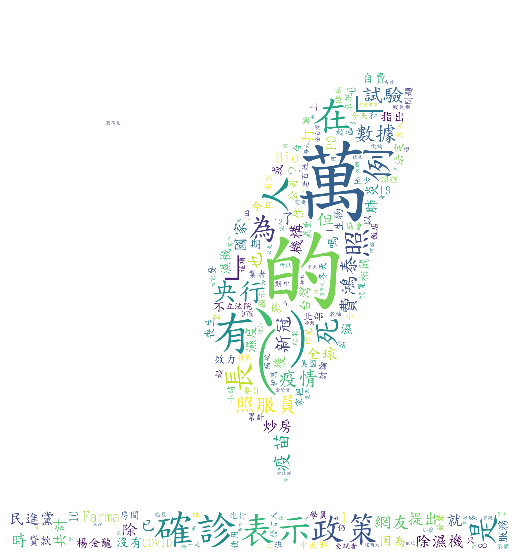

In [19]:
import matplotlib.pyplot as plt
#plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei'] 
plt.figure(figsize=(14,10))
plt.imshow(unioncloud)
plt.axis("off")
plt.show()